In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.stats import pearsonr
import datetime as dt
pd.set_option('display.max_columns',200)
pd.set_option('display.max_rows',1000)
pd.set_option('display.max_colwidth',None)

In [2]:
#lecture des différents datasets

df_geo=pd.read_csv('olist_geolocation_dataset.csv')
df_custom =pd.read_csv('olist_customers_dataset.csv')
df_Order=pd.read_csv('olist_orders_dataset.csv')
df_Orditem=pd.read_csv('olist_order_items_dataset.csv')
df_pay=pd.read_csv('olist_order_payments_dataset.csv')
df_review=pd.read_csv('olist_order_reviews_dataset.csv')
df_prod=pd.read_csv('olist_products_dataset.csv')
df_seller=pd.read_csv('olist_sellers_dataset.csv')
df_prodcat=pd.read_csv('product_category_name_translation.csv')

In [3]:
df_geo.head(2)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP


In [4]:
df_geo.shape

(1000163, 5)

In [5]:
df_custom.head(2)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP


In [6]:
df_custom.shape

(99441, 5)

In [7]:
df_Order.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00


In [8]:
df_Order.shape

(99441, 8)

In [9]:
df_Order.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [10]:
df_Order["order_approved_at"].isna().sum()

160

In [11]:
df_Orditem.head(2)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93


In [12]:
df_Orditem.shape

(112650, 7)

In [13]:
df_pay.head(2)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39


In [14]:
df_pay['order_id'].is_unique

False

In [15]:
df_pay[['order_id', 'payment_type']].shape

(103886, 2)

In [16]:
df_pay[['order_id', 'payment_sequential','payment_type','payment_installments']].drop_duplicates().shape

(103886, 4)

In [17]:
df_pay.shape

(103886, 5)

In [18]:
df_review.head(2)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13


In [19]:
df_review.shape

(99224, 7)

In [20]:
df_prod.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [21]:
df_prod['product_photos_qty'].max()

20.0

In [22]:
df_prod.shape

(32951, 9)

In [23]:
#missing values
#-------------------------------------
df_prod["product_category_name"].isna().sum()

610

In [24]:
df_prod.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [25]:
df_prod.columns

Index(['product_id', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'],
      dtype='object')

In [26]:
df_prod.shape

(32951, 9)

In [27]:
df_seller.head(2)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP


In [28]:
df_seller.shape

(3095, 4)

In [29]:
df_prodcat.head(2)

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories


In [30]:
df_prodcat.shape

(71, 2)

In [31]:
df_prodcat.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

In [32]:
df_geo['geolocation_state'].value_counts()

SP    404268
MG    126336
RJ    121169
RS     61851
PR     57859
SC     38328
BA     36045
GO     20139
ES     16748
PE     16432
DF     12986
MT     12031
CE     11674
PA     10853
MS     10431
MA      7853
PB      5538
RN      5041
PI      4549
AL      4183
TO      3576
SE      3563
RO      3478
AM      2432
AC      1301
AP       853
RR       646
Name: geolocation_state, dtype: int64

<AxesSubplot:>

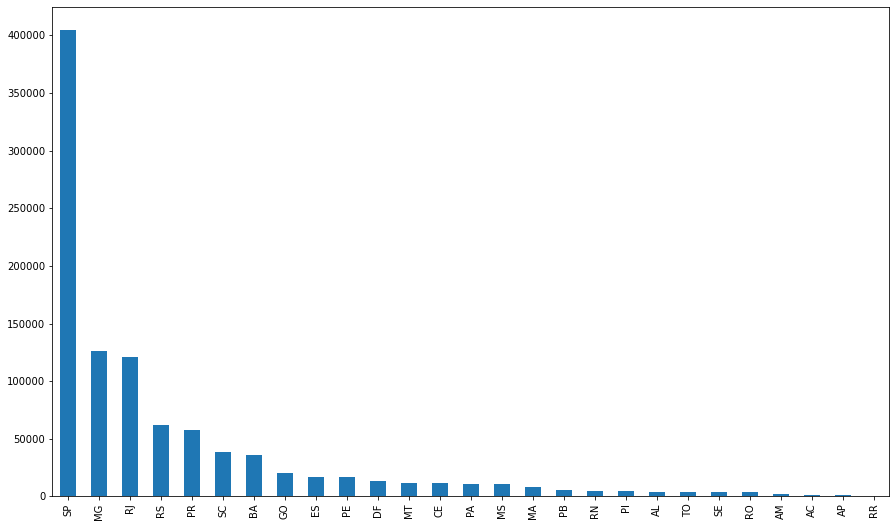

In [33]:
fig = plt.figure(figsize=(15, 9))
df_geo['geolocation_state'].value_counts().plot(kind='bar')

In [34]:
df_geo.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [35]:
df_geo.drop(["geolocation_zip_code_prefix",
                  "geolocation_city",
                  "geolocation_state"], axis=1, inplace=True)

In [36]:
df_geo.shape

(1000163, 2)

In [37]:
df_custom['customer_city'].value_counts()

sao paulo            15540
rio de janeiro        6882
belo horizonte        2773
brasilia              2131
curitiba              1521
                     ...  
bequimao                 1
andarai                  1
vargem grande            1
curvelandia              1
eugenio de castro        1
Name: customer_city, Length: 4119, dtype: int64

In [38]:
df_Order.drop(["order_delivered_carrier_date","order_approved_at",
                  "order_estimated_delivery_date"], axis=1, inplace=True)

In [39]:
# Merging customers and orders datasets

df1= pd.merge(df_custom,df_Order, on='customer_id')
df1.head(2)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_delivered_customer_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-25 10:35:35
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-29 12:41:19


In [40]:
df_Orditem.drop(["seller_id",
                  "shipping_limit_date"], axis=1, inplace=True)

In [41]:
# Merging customers, orders and order-items datasets
df2 = pd.merge(df1, df_Orditem, on='order_id')
df2.head(2)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_item_id,product_id,price,freight_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-25 10:35:35,1,a9516a079e37a9c9c36b9b78b10169e8,124.99,21.88
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-29 12:41:19,1,4aa6014eceb682077f9dc4bffebc05b0,289.00,46.48


In [42]:
df2.shape

(112650, 13)

In [43]:
df_pay.drop(["payment_sequential", "payment_installments", "payment_value"], axis=1, inplace=True)

In [44]:
# Merging customers, orders, order-items and df_pay datasets
df3 = pd.merge(df2, df_pay, on='order_id')

In [45]:
df_review.drop(["review_id","review_comment_title","review_comment_message","review_creation_date","review_answer_timestamp"], axis=1, inplace=True)

In [46]:
# Merging customers, orders, order-items, df_pay and df_review datasets
df4=pd.merge(df3, df_review, on='order_id')

In [47]:
df4.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_item_id,product_id,price,freight_value,payment_type,review_score
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-25 10:35:35,1,a9516a079e37a9c9c36b9b78b10169e8,124.99,21.88,credit_card,4
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-29 12:41:19,1,4aa6014eceb682077f9dc4bffebc05b0,289.00,46.48,credit_card,5
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-06-14 17:58:51,1,bd07b66896d6f1494f5b86251848ced7,139.94,17.79,credit_card,5
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-28 16:04:25,1,a5647c44af977b148e0a3a4751a09e2e,149.94,23.36,credit_card,5
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-08-09 20:55:48,1,9391a573abe00141c56e38d84d7d5b3b,230.00,22.25,credit_card,5


In [48]:

df_prod.drop(["product_name_lenght","product_description_lenght","product_photos_qty","product_weight_g",
              "product_length_cm","product_height_cm","product_width_cm"],axis=1,inplace=True)


In [49]:
# Merging customers, orders, order-items, df_pay, df_review and df_prod datasets
df5 = pd.merge(df4, df_prod, on='product_id')

In [50]:
df_prodcat.columns

Index(['product_category_name', 'product_category_name_english'], dtype='object')

In [51]:
type(df_prodcat['product_category_name_english'])

pandas.core.series.Series

In [52]:
df5.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_delivered_customer_date',
       'order_item_id', 'product_id', 'price', 'freight_value', 'payment_type',
       'review_score', 'product_category_name'],
      dtype='object')

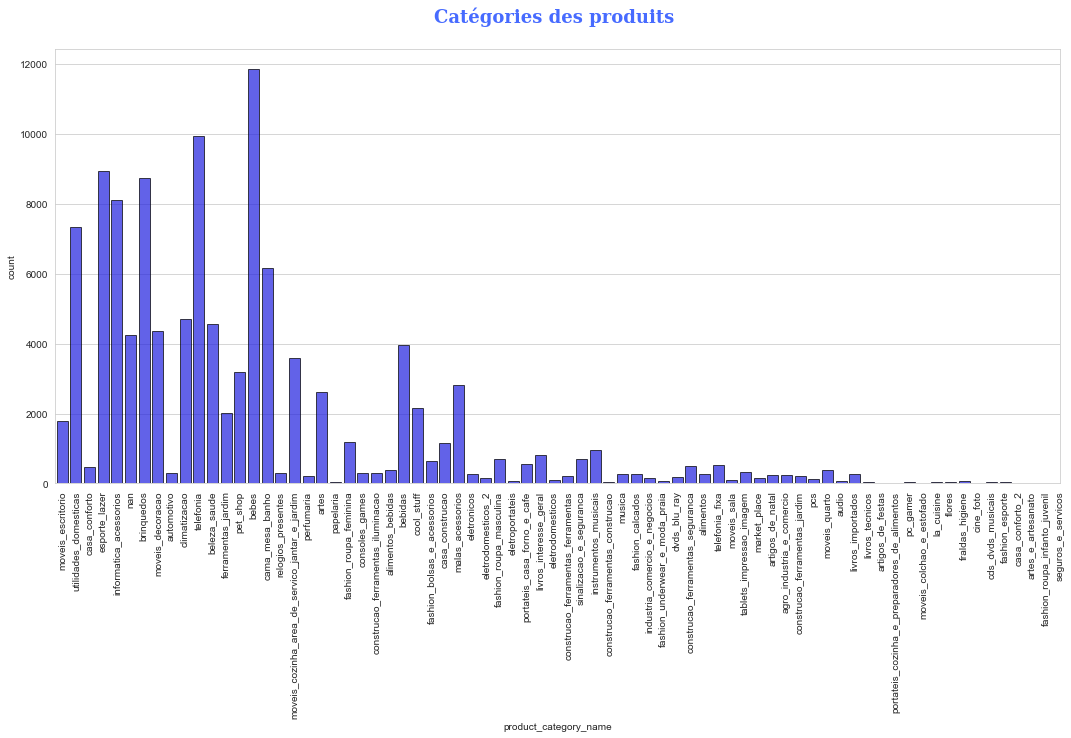

In [53]:
# Plot categories count in dataset
sns.set_style("whitegrid")
font_title = {"family": "serif",
              "color":  "#476bff",
              "weight": "bold",
              "size": 18}

fig = plt.figure(figsize=(18, 8))
sns.countplot(data=df5, x="product_category_name",
              edgecolor="black",color="#0000FF", alpha=0.7)
         #     color="#00d994", alpha=0.7)
plt.xticks(range(0, df5["product_category_name"].nunique()+1),
           df5["product_category_name"].unique(),
           rotation=90)
plt.title(f"Catégories des produits \n",
          fontdict=font_title)
plt.show()

In [54]:
df5.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_item_id,product_id,price,freight_value,payment_type,review_score,product_category_name
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-25 10:35:35,1,a9516a079e37a9c9c36b9b78b10169e8,124.99,21.88,credit_card,4,moveis_escritorio
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-28 00:09:50,1,a9516a079e37a9c9c36b9b78b10169e8,112.99,24.90,credit_card,1,moveis_escritorio
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-28 00:09:50,2,a9516a079e37a9c9c36b9b78b10169e8,112.99,24.90,credit_card,1,moveis_escritorio
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-26 09:54:04,1,a9516a079e37a9c9c36b9b78b10169e8,124.99,15.62,credit_card,3,moveis_escritorio
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-28 21:09:00,1,a9516a079e37a9c9c36b9b78b10169e8,106.99,30.59,credit_card,4,moveis_escritorio


In [55]:
df5.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_item_id,product_id,price,freight_value,payment_type,review_score,product_category_name
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-25 10:35:35,1,a9516a079e37a9c9c36b9b78b10169e8,124.99,21.88,credit_card,4,moveis_escritorio
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-28 00:09:50,1,a9516a079e37a9c9c36b9b78b10169e8,112.99,24.90,credit_card,1,moveis_escritorio
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-28 00:09:50,2,a9516a079e37a9c9c36b9b78b10169e8,112.99,24.90,credit_card,1,moveis_escritorio
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-26 09:54:04,1,a9516a079e37a9c9c36b9b78b10169e8,124.99,15.62,credit_card,3,moveis_escritorio
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-28 21:09:00,1,a9516a079e37a9c9c36b9b78b10169e8,106.99,30.59,credit_card,4,moveis_escritorio


In [56]:
df6=df5

In [57]:
df6.shape

(117329, 16)

In [58]:
df6.isna().sum()

customer_id                         0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
order_id                            0
order_status                        0
order_purchase_timestamp            0
order_delivered_customer_date    2471
order_item_id                       0
product_id                          0
price                               0
freight_value                       0
payment_type                        0
review_score                        0
product_category_name            1695
dtype: int64

In [59]:
df6.shape

(117329, 16)

In [60]:
df6.isna().sum()

customer_id                         0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
order_id                            0
order_status                        0
order_purchase_timestamp            0
order_delivered_customer_date    2471
order_item_id                       0
product_id                          0
price                               0
freight_value                       0
payment_type                        0
review_score                        0
product_category_name            1695
dtype: int64

In [61]:
df6.isna().sum()

customer_id                         0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
order_id                            0
order_status                        0
order_purchase_timestamp            0
order_delivered_customer_date    2471
order_item_id                       0
product_id                          0
price                               0
freight_value                       0
payment_type                        0
review_score                        0
product_category_name            1695
dtype: int64

In [62]:
df6.nunique()

customer_id                      97916
customer_unique_id               94720
customer_zip_code_prefix         14955
customer_city                     4108
customer_state                      27
order_id                         97916
order_status                         7
order_purchase_timestamp         97370
order_delivered_customer_date    95021
order_item_id                       21
product_id                       32789
price                             5948
freight_value                     6976
payment_type                         4
review_score                         5
product_category_name               73
dtype: int64

In [63]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117329 entries, 0 to 117328
Data columns (total 16 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id                    117329 non-null  object 
 1   customer_unique_id             117329 non-null  object 
 2   customer_zip_code_prefix       117329 non-null  int64  
 3   customer_city                  117329 non-null  object 
 4   customer_state                 117329 non-null  object 
 5   order_id                       117329 non-null  object 
 6   order_status                   117329 non-null  object 
 7   order_purchase_timestamp       117329 non-null  object 
 8   order_delivered_customer_date  114858 non-null  object 
 9   order_item_id                  117329 non-null  int64  
 10  product_id                     117329 non-null  object 
 11  price                          117329 non-null  float64
 12  freight_value                 

In [64]:
df6.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_item_id,product_id,price,freight_value,payment_type,review_score,product_category_name
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-25 10:35:35,1,a9516a079e37a9c9c36b9b78b10169e8,124.99,21.88,credit_card,4,moveis_escritorio
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-28 00:09:50,1,a9516a079e37a9c9c36b9b78b10169e8,112.99,24.90,credit_card,1,moveis_escritorio
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-28 00:09:50,2,a9516a079e37a9c9c36b9b78b10169e8,112.99,24.90,credit_card,1,moveis_escritorio
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-26 09:54:04,1,a9516a079e37a9c9c36b9b78b10169e8,124.99,15.62,credit_card,3,moveis_escritorio
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-28 21:09:00,1,a9516a079e37a9c9c36b9b78b10169e8,106.99,30.59,credit_card,4,moveis_escritorio


In [65]:
df6[['order_status']].value_counts()

order_status
delivered       114859
shipped           1167
canceled           553
invoiced           370
processing         370
unavailable          7
approved             3
dtype: int64

In [66]:
# Filtrage pour ne conserver que les lignes "delivered"

df6 = df6[df6["order_status"] == "delivered"]

In [197]:
df6["order_status"] == "delivered"

0         True
1         True
2         True
3         True
4         True
          ... 
114854    True
114855    True
114856    True
114857    True
114858    True
Name: order_status, Length: 114859, dtype: bool

In [198]:
type(df6["order_status"] == "delivered")

pandas.core.series.Series

In [67]:
#Check if there is any Price = 0 or <0

df6[(df6['price']==0)|(df6['price']<0)].head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_item_id,product_id,price,freight_value,payment_type,review_score,product_category_name


In [68]:
df6.price.min()

0.85

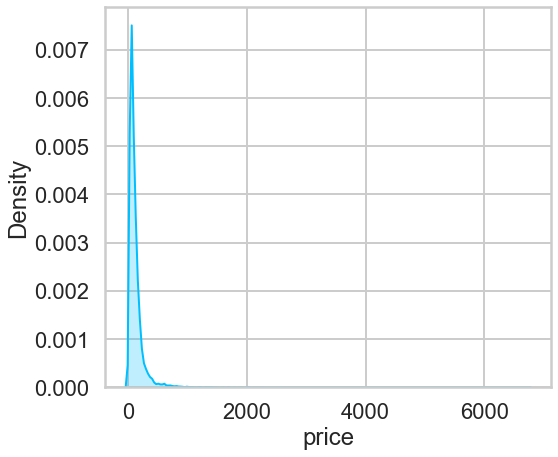

In [69]:

fig = plt.figure(figsize=(8, 7))
sns.set_context('poster', font_scale = 1)
sns.kdeplot(data=df6['price'], color='deepskyblue',fill=True)
plt.show()

/Users/asus2/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


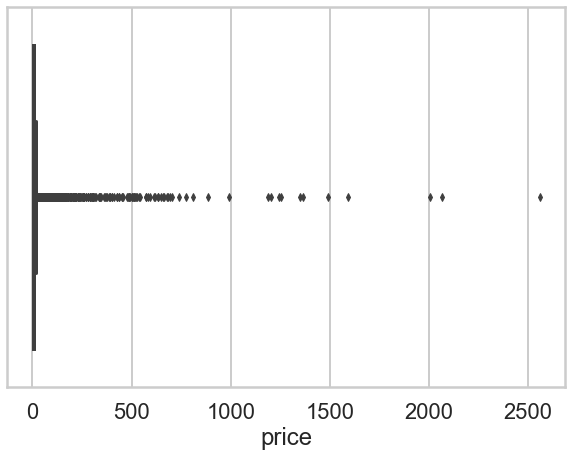

In [70]:
fig = plt.figure(figsize=(10, 7))
pr=df6['price'].value_counts()
ax = sns.boxplot(pr)

/Users/asus2/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

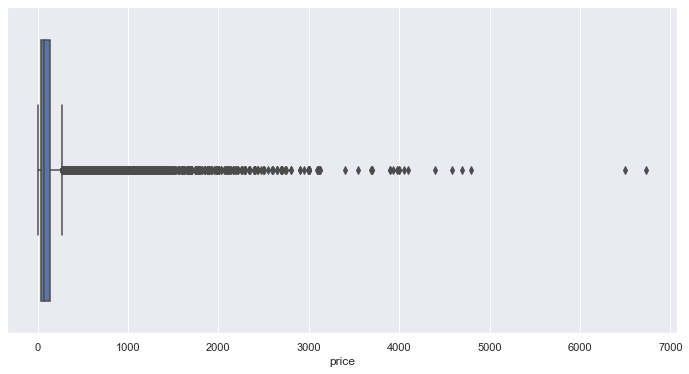

In [71]:
sns.set(rc={"figure.figsize":(12, 6)}) #width=6, height=5
sns.boxplot(df6['price'])
#sns.boxplot(df6[], )

In [72]:
df6.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_delivered_customer_date',
       'order_item_id', 'product_id', 'price', 'freight_value', 'payment_type',
       'review_score', 'product_category_name'],
      dtype='object')

In [73]:
#Nombres de clients (avec répétition) par ville

city_clients = df6[['customer_city', 'customer_unique_id']].groupby(['customer_city']).agg('count').reset_index().\
                        sort_values('customer_unique_id', ascending=False)
#city_clients.rename(columns={'customer_unique_id': 'nombre clients'},
                #    inplace=True)
city_clients.head()

,customer_city,customer_unique_id
3561,sao paulo,18168
3125,rio de janeiro,7914
449,belo horizonte,3195
553,brasilia,2413
1135,curitiba,1784


In [74]:
#Nombres de clients unique par ville

city_customers = df6[['customer_city', 'customer_unique_id']].groupby(['customer_city']).agg({"customer_unique_id":'nunique'}).reset_index().\
                        sort_values('customer_unique_id', ascending=False)
city_customers.head()

,customer_city,customer_unique_id
3561,sao paulo,14435
3125,rio de janeiro,6299
449,belo horizonte,2591
553,brasilia,2003
1135,curitiba,1427


In [75]:
df6[['customer_city']].value_counts().max()

18168

In [76]:
df6.dtypes

customer_id                       object
customer_unique_id                object
customer_zip_code_prefix           int64
customer_city                     object
customer_state                    object
order_id                          object
order_status                      object
order_purchase_timestamp          object
order_delivered_customer_date     object
order_item_id                      int64
product_id                        object
price                            float64
freight_value                    float64
payment_type                      object
review_score                       int64
product_category_name             object
dtype: object

In [77]:
type(city_clients)

pandas.core.frame.DataFrame

In [78]:
df6.groupby(["customer_unique_id"]).agg({"order_id":'count'}).sort_values('order_id', ascending=False)

,order_id
customer_unique_id,
9a736b248f67d166d2fbb006bcb877c3,75
6fbc7cdadbb522125f4b27ae9dee4060,38
f9ae226291893fda10af7965268fb7f6,35
569aa12b73b5f7edeaa6f2a01603e381,26
d97b3cfb22b0d6b25ac9ed4e9c2d481b,24
...,...
5ba477d7c86256dbb02331d06dc79e03,1
5ba3752845638cceebbf30d2acbf08b5,1
5ba3404c4dea10b76ed8db6f1999b012,1


In [79]:
#Number of total orders per customer (nombre de commandes)
#-------------------------------------------
total_orders = df6[['customer_unique_id', 'order_id']].groupby(['customer_unique_id']).agg('count').reset_index().\
                        sort_values('order_id', ascending=False)
total_orders.head()

,customer_unique_id,order_id
55992,9a736b248f67d166d2fbb006bcb877c3,75
40563,6fbc7cdadbb522125f4b27ae9dee4060,38
90519,f9ae226291893fda10af7965268fb7f6,35
31448,569aa12b73b5f7edeaa6f2a01603e381,26
78884,d97b3cfb22b0d6b25ac9ed4e9c2d481b,24


In [80]:
#Number of unique orders per customer
#-------------------------------------------
commandes_unique = df6[['customer_unique_id', 'order_id']].groupby(['customer_unique_id']).agg({'order_id':'nunique'}).reset_index().\
                        sort_values('order_id', ascending=False)

commandes_unique.head()

,customer_unique_id,order_id
51102,8d50f5eadf50201ccdcedfb9e2ac8455,15
22632,3e43e6105506432c953e165fb2acf44c,9
73436,ca77025e7201e3b30c44b472ff346268,7
36476,6469f99c1f9dfae7733b25662e7f1782,7
10001,1b6c7548a2a1f9037c1fd3ddfed95f33,7


In [81]:
# Nombre de commandes du client dont customer_unique_id=='9a736b248f67d166d2fbb006bcb877c3' avec 2 order_id différents

df6.loc[df6.customer_unique_id=='9a736b248f67d166d2fbb006bcb877c3', 'order_id'].value_counts()

895ab968e7bb0d5659d16cd74cd1650c    63
67d83bd36ec2c7fb557742fb58837659    12
Name: order_id, dtype: int64

In [82]:
# Nombre de commandes uniques du client dont customer_unique_id=='9a736b248f67d166d2fbb006bcb877c3'

df6.loc[df6.customer_unique_id=='9a736b248f67d166d2fbb006bcb877c3', 'order_id'].nunique()

2

In [83]:
df6.loc[df6.customer_unique_id=='9a736b248f67d166d2fbb006bcb877c3', 'order_id'].count()

75

In [84]:
# Nombre de commandes du client dont customer_unique_id == "9a736b248f67d166d2fbb006bcb877c3"

df6.query('customer_unique_id == "9a736b248f67d166d2fbb006bcb877c3"')['order_id'].value_counts()

895ab968e7bb0d5659d16cd74cd1650c    63
67d83bd36ec2c7fb557742fb58837659    12
Name: order_id, dtype: int64

In [85]:
df6.loc[df6.customer_unique_id=='8d50f5eadf50201ccdcedfb9e2ac8455', 'order_id'].count()

15

In [86]:
df6.loc[df6.customer_unique_id=='8d50f5eadf50201ccdcedfb9e2ac8455', 'order_id'].value_counts()

6bdf325f0966e3056651285c0aed5aad    1
b850a16d8faf65a74c51287ef34379ce    1
23427a6bd9f8fd1b51f1b1e5cc186ab8    1
c2213109a2cc0e75d55585b7aaac6d97    1
369634708db140c5d2c4e365882c443a    1
bf92c69b7cc70f7fc2c37de43e366173    1
4f62d593acae92cea3c5662c76122478    1
89d9b111d2b990deb5f5f9769f92800b    1
112eb6f37f1b9dabbced368fbbc6c9ef    1
519203404f6116d406a970763ee75799    1
d3582fd5ccccd9cb229a63dfb417c86f    1
a1a6eadae352582010f449d8527b55f3    1
838f8e96cf584a1d8d22eaf7143c7772    1
cd4b336a02aacabd0ef22f6db711f95e    1
e3071b7624445af6e4f3a1b23718667d    1
Name: order_id, dtype: int64

In [87]:
df6.loc[df6.customer_unique_id=='8d50f5eadf50201ccdcedfb9e2ac8455', 'order_id'].nunique()

15

In [88]:
df6.groupby(by="order_status").sum()["order_item_id"]

order_status
delivered    137209
Name: order_item_id, dtype: int64

In [89]:
df6.shape

(114859, 16)

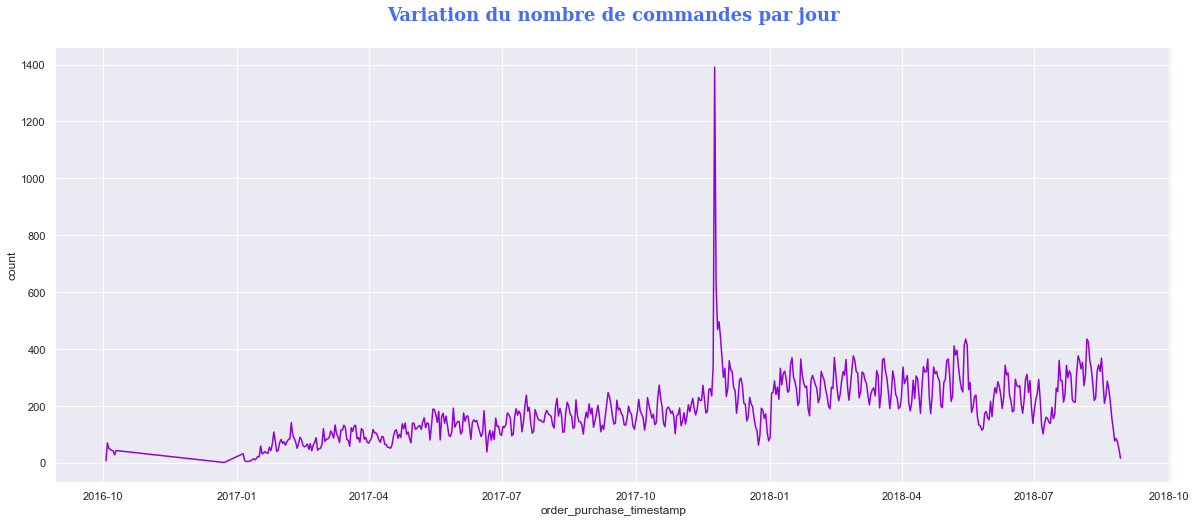

In [90]:
# Variation du nombre de commande par jour 

orders_day = df6.groupby(df6["order_purchase_timestamp"].astype('datetime64[ns]').dt.date).count()["order_id"]
fig = plt.figure(figsize=(20, 8))
ax = orders_day.plot(color="#9400d9")
ax.set_ylabel("count")
plt.title(f"Variation du nombre de commandes par jour\n",
          fontdict=font_title)
plt.show()



Nous considérons dans la suite, la distribution du nombre de commandes par jour de la semaine ou par mois :

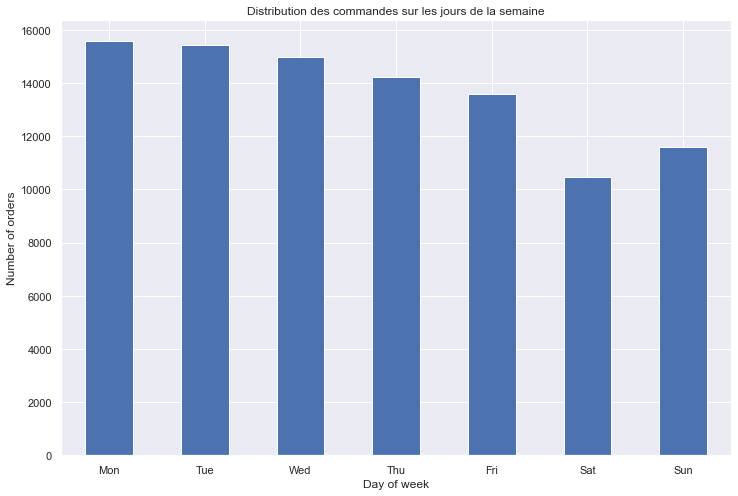

In [91]:
df6.groupby(df6['order_purchase_timestamp'].astype('datetime64[ns]').dt.dayofweek)\
    .agg({"order_id": "nunique"}).plot(figsize=(12,8), kind="bar",
          title="Distribution des commandes sur les jours de la semaine",
          ylabel="Number of orders",
          xlabel="Day of week",
          legend=False)
plt.xticks(np.arange(0,7), ['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], rotation='horizontal')
plt.show()

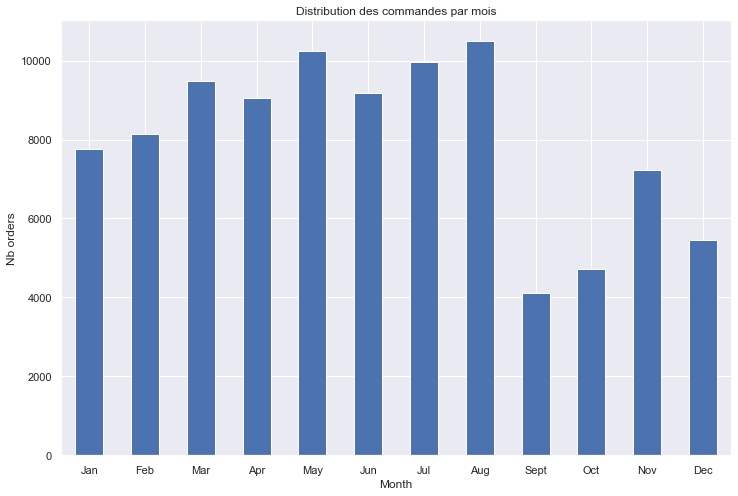

In [92]:
df6.groupby(df6['order_purchase_timestamp'].astype('datetime64[ns]').dt.month).agg({"order_id": "nunique"})\
    .plot(figsize=(12,8), kind="bar",
          title="Distribution des commandes par mois",
          ylabel="Nb orders",
          xlabel="Month",
          legend=False)
plt.xticks(np.arange(0,12), ['Jan','Feb','Mar','Apr','May','Jun',
                             'Jul','Aug','Sept','Oct','Nov','Dec'], 
           rotation='horizontal')
plt.show()

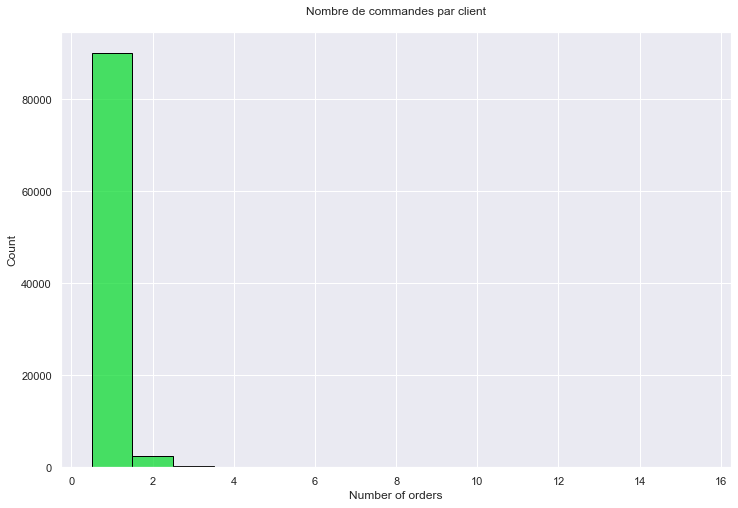

In [93]:
fig = plt.figure(figsize=(12, 8))
sns.histplot(df6.groupby("customer_unique_id").agg({"order_id": "nunique"}),
             x="order_id",
             discrete=True,
             edgecolor="black",
           #  color="#00d994", alpha=0.7)
           color="#00d927", alpha=0.7)
plt.xlabel("Number of orders")
plt.title(f"Nombre de commandes par client\n")
plt.show()


In [94]:
df6.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_delivered_customer_date',
       'order_item_id', 'product_id', 'price', 'freight_value', 'payment_type',
       'review_score', 'product_category_name'],
      dtype='object')

In [95]:
df6['product_category_name'].nunique()

73

In [96]:
df6.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_delivered_customer_date',
       'order_item_id', 'product_id', 'price', 'freight_value', 'payment_type',
       'review_score', 'product_category_name'],
      dtype='object')

Nous allons regrouper les différentes catégories le jeu de données puisqu'il comporte plus de 70 catégories, pour éviter les problèmes d'encodage lors des preprocessing. 

Voici les catégories principales des sites de vente en ligne en 2017, disponibles sur le site http://statista.com :

- Health and Beauty
- Books, CDs and other media
- Toys and baby equipment
- Fashion, clothing and accessories
- Groceries, food and drink
- Home and furniture
- Gifts Flowers flowers
- Technology including computers and phones 
- sport and outdour
- Others

Dans la suite nous les attribuons manuellement :

In [97]:
df6['product_category'] =  np.where((df6['product_category_name'].str.contains("health|beauty|perfum")==True),
                                    'health_beauty',
                           np.where((df6['product_category_name'].str.contains("fashio|shoes|luggage")==True),
                                    'fashion_clothing',
                           np.where((df6['product_category_name'].str.contains("toy|baby|diaper")==True),
                                     'toys_baby',
                           np.where((df6['product_category_name'].str.contains("book|cd|dvd|media")==True),
                                     'books_cds_media',
                           np.where((df6['product_category_name'].str.contains("grocer|food|drink")==True), 
                                     'groceries_food_drink',
                           np.where((df6['product_category_name'].str.contains("home|furnitur|garden|bath|house|applianc")==True), 
                                                                                          'home_furniture',
                           np.where((df6['product_category_name'].str.contains("sport")==True),
                                     'sports_outdoor',
                           np.where((df6['product_category_name'].str.contains("flow|gift|stuff")==True),
                                     'gifts_flowers',
                           np.where((df6['product_category_name'].str.contains("phon|compu|tablet|electro|consol")==True), 
                                     'technology',
                                     'others')))))))))


/var/folders/27/wwsy152x0030nt23722_jnwc0000gq/T/ipykernel_2182/3602673909.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6['product_category'] =  np.where((df6['product_category_name'].str.contains("health|beauty|perfum")==True),


In [98]:
df6.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_item_id,product_id,price,freight_value,payment_type,review_score,product_category_name,product_category
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-25 10:35:35,1,a9516a079e37a9c9c36b9b78b10169e8,124.99,21.88,credit_card,4,moveis_escritorio,others
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-28 00:09:50,1,a9516a079e37a9c9c36b9b78b10169e8,112.99,24.90,credit_card,1,moveis_escritorio,others
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-28 00:09:50,2,a9516a079e37a9c9c36b9b78b10169e8,112.99,24.90,credit_card,1,moveis_escritorio,others
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-26 09:54:04,1,a9516a079e37a9c9c36b9b78b10169e8,124.99,15.62,credit_card,3,moveis_escritorio,others
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-28 21:09:00,1,a9516a079e37a9c9c36b9b78b10169e8,106.99,30.59,credit_card,4,moveis_escritorio,others


In [99]:
df6["product_category"].value_counts()

others              94703
sports_outdoor       8736
gifts_flowers        3888
health_beauty        3495
fashion_clothing     2741
technology           1215
books_cds_media        81
Name: product_category, dtype: int64

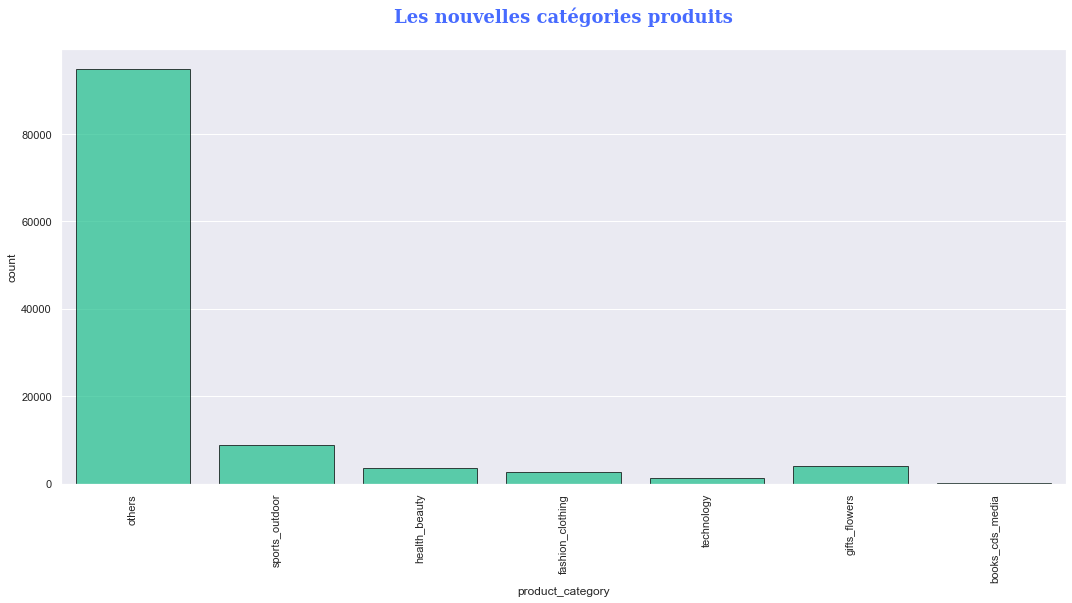

In [100]:
# Plot categories count in dataset
fig = plt.figure(figsize=(18, 8))
sns.countplot(data=df6, x="product_category",
              edgecolor="black",
              color="#00d994", alpha=0.7)
plt.xticks(range(0, df6["product_category"].nunique()),
           df6["product_category"].unique(),
           rotation=90)
plt.title(f"Les nouvelles catégories produits\n",
          fontdict=font_title)
plt.show()

In [101]:
df6.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_delivered_customer_date',
       'order_item_id', 'product_id', 'price', 'freight_value', 'payment_type',
       'review_score', 'product_category_name', 'product_category'],
      dtype='object')

In [102]:
df6.head(10)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_item_id,product_id,price,freight_value,payment_type,review_score,product_category_name,product_category
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-25 10:35:35,1,a9516a079e37a9c9c36b9b78b10169e8,124.99,21.88,credit_card,4,moveis_escritorio,others
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-28 00:09:50,1,a9516a079e37a9c9c36b9b78b10169e8,112.99,24.90,credit_card,1,moveis_escritorio,others
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-28 00:09:50,2,a9516a079e37a9c9c36b9b78b10169e8,112.99,24.90,credit_card,1,moveis_escritorio,others
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-26 09:54:04,1,a9516a079e37a9c9c36b9b78b10169e8,124.99,15.62,credit_card,3,moveis_escritorio,others
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-28 21:09:00,1,a9516a079e37a9c9c36b9b78b10169e8,106.99,30.59,credit_card,4,moveis_escritorio,others
5,fd3a0b1bd209f0e7d420c9c3d1127613,567ab47ca4deb92d46dbf54dce07d0a7,88460,angelina,SC,574fe1739f65af76badd0999db300b4f,delivered,2017-03-23 15:10:17,2017-04-11 10:16:56,1,a9516a079e37a9c9c36b9b78b10169e8,126.99,15.06,credit_card,4,moveis_escritorio,others
6,fbd40c083aa8cddebb5265b2ba6aaf2e,f40ab89b622248b7ca125af4b486b887,32341,contagem,MG,e0b26f14d2bcc710bb02f77a4628763b,delivered,2017-05-16 10:00:49,2017-05-29 12:04:19,1,a9516a079e37a9c9c36b9b78b10169e8,124.99,30.71,boleto,4,moveis_escritorio,others
7,10558ef4afea173bfb5e2cbe3d5b0bb5,749943913a9851a39c9baf51877fbab6,78134,varzea grande,MT,eaae5bd20fb15d85aa673d9b7c0e8ca5,delivered,2017-03-18 23:04:36,2017-05-30 09:19:58,1,a9516a079e37a9c9c36b9b78b10169e8,126.99,21.34,credit_card,2,moveis_escritorio,others
8,1c37c0f0cd1d88d46d9fc9494762abbd,432ecfa8b7b7ad2663c7abed0dc83c51,31270,belo horizonte,MG,c4e2bd2043fbd75b325a47adfabf0d77,delivered,2018-03-15 07:45:10,2018-04-05 12:37:25,1,a9516a079e37a9c9c36b9b78b10169e8,116.99,33.08,credit_card,3,moveis_escritorio,others
9,20a452f528d487411fd7d3ebda1d0f20,31318a0597cd9d50ce4cfd03c80fe780,37540,santa rita do sapucai,MG,1c7fe02ac4c7be50c59afb295cf85b89,delivered,2018-01-26 13:22:09,2018-02-20 14:18:51,1,a9516a079e37a9c9c36b9b78b10169e8,106.99,21.76,boleto,2,moveis_escritorio,others


In [103]:
df6.shape

(114859, 17)

In [104]:
#Number of product categories
#-------------------------------------------
number_category = df6[['customer_unique_id', 'product_category']].groupby(['customer_unique_id']).agg({"product_category":'nunique'}).reset_index().\
                        sort_values('product_category', ascending=False)
number_category.head(5)

,customer_unique_id,product_category
26081,47c1a3033b8b77b3ab6e109eb4d5fdf3,3
22657,3e5306add1209e5ba184092dd1587282,3
65167,b39dde6dd619943190a8cc9aa6db38a4,3
50725,8c21dd8c37144807c601f99f2a209dfb,3
65630,b4e4f24de1e8725b74e4a1f4975116ed,3


In [105]:
#le nombre moyen d'articles par commande pour chaque client 
products_per_order = df6.groupby(["customer_unique_id", "order_id"])\
                        .agg({"order_item_id": "count"})
products_per_order = products_per_order.groupby("customer_unique_id")\
                        .agg({"order_item_id": "mean"})
products_per_order.head(5)

,order_item_id
customer_unique_id,
0000366f3b9a7992bf8c76cfdf3221e2,1.0
0000b849f77a49e4a4ce2b2a4ca5be3f,1.0
0000f46a3911fa3c0805444483337064,1.0
0000f6ccb0745a6a4b88665a16c9f078,1.0
0004aac84e0df4da2b147fca70cf8255,1.0


In [106]:
df6[['product_category']].value_counts()

product_category
others              94703
sports_outdoor       8736
gifts_flowers        3888
health_beauty        3495
fashion_clothing     2741
technology           1215
books_cds_media        81
dtype: int64

In [107]:
df6[['product_category']].count()

product_category    114859
dtype: int64

In [108]:
df6[['product_category']].nunique()

product_category    7
dtype: int64

In [109]:
df6.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_delivered_customer_date',
       'order_item_id', 'product_id', 'price', 'freight_value', 'payment_type',
       'review_score', 'product_category_name', 'product_category'],
      dtype='object')

<b> Création de nouvelles variables: <b>

La variable "customer_unique_id" contient l'identifiant unique de chaque client. Nous pourrons donc supprimer la  variable "order_delivered_customer_date", et créer une autre variable qui représente le délai le livraison de chaque commande.

In [110]:
# Délai moyen en jours  de livraison des commandes
df6["delivery_duration"] = (df6['order_delivered_customer_date'].astype('datetime64[ns]')
                               - df6['order_purchase_timestamp'].astype('datetime64[ns]'))\
                              .dt.round('1d').dt.days


df6.drop(["order_delivered_customer_date"], axis=1, inplace=True)

/var/folders/27/wwsy152x0030nt23722_jnwc0000gq/T/ipykernel_2182/1299795640.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6["delivery_duration"] = (df6['order_delivered_customer_date'].astype('datetime64[ns]')
/var/folders/27/wwsy152x0030nt23722_jnwc0000gq/T/ipykernel_2182/1299795640.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6.drop(["order_delivered_customer_date"], axis=1, inplace=True)


Comme la majorité des clients n'ont passé qu'une seule commande, il n'est pas convenable de faire un classement des catégories de produits préférées.  Pour cela, nous créons une variable par catégorie produit pour distribuer le nombre de produits achetés selon les commandes passées.
Ensuite, nous déterminons le ratio du nombre de produits par catégorie sur le nombre de produits total acheté par le client.

In [111]:
#catégories des produits selon les clients

categories_products = df6.groupby(["customer_unique_id", "product_category"])\
                        .agg({"order_item_id": "count"}).unstack()
categories_products.columns = categories_products.columns.droplevel(0)
categories_products.fillna(0, inplace=True)
categories_products["total_items"] = categories_products.sum(axis=1)

# ratio of total items
for col in categories_products.columns:
    if (col != "total_items"):
        categories_products[col] = (categories_products[col]/categories_products["total_items"])

categories_products.reset_index(inplace=True)
categories_products.head(100)

product_category,customer_unique_id,books_cds_media,fashion_clothing,gifts_flowers,health_beauty,others,sports_outdoor,technology,total_items
0,0000366f3b9a7992bf8c76cfdf3221e2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0000f46a3911fa3c0805444483337064,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0000f6ccb0745a6a4b88665a16c9f078,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0004aac84e0df4da2b147fca70cf8255,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
5,0004bd2a26a76fe21f786e4fbd80607f,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
6,00050ab1314c0e55a6ca13cf7181fecf,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
7,00053a61a98854899e70ed204dd4bafe,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0
8,0005e1862207bf6ccc02e4228effd9a0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
9,0005ef4cd20d2893f0d9fbd94d3c0d97,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


Comme le score donné par le client peut varier selon la commande, nous avons besoin du score moyen donné par chaque client.

In [112]:
# Mean score of review score

mean_score = df6[['customer_unique_id', 'review_score']].\
    groupby('customer_unique_id').mean()

mean_score = mean_score.rename(columns={"review_score": "mean_score"})
mean_score.head()

,mean_score
customer_unique_id,
0000366f3b9a7992bf8c76cfdf3221e2,5.0
0000b849f77a49e4a4ce2b2a4ca5be3f,4.0
0000f46a3911fa3c0805444483337064,3.0
0000f6ccb0745a6a4b88665a16c9f078,4.0
0004aac84e0df4da2b147fca70cf8255,5.0


 Le montant total dépensé par le client est le prix du produit plus les frais de fret.

In [113]:
# Total spending amount = total price + total freight
df6['total_cost']=df6['price']+df6['freight_value']
total_cost = df6[['customer_unique_id','total_cost']].\
    groupby('customer_unique_id').sum()
total_cost = total_cost.rename(columns={"price": "total_cost"})


/var/folders/27/wwsy152x0030nt23722_jnwc0000gq/T/ipykernel_2182/1551656146.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6['total_cost']=df6['price']+df6['freight_value']


In [114]:
df6.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_item_id,product_id,price,freight_value,payment_type,review_score,product_category_name,product_category,delivery_duration,total_cost
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,1,a9516a079e37a9c9c36b9b78b10169e8,124.99,21.88,credit_card,4,moveis_escritorio,others,9.0,146.87
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,1,a9516a079e37a9c9c36b9b78b10169e8,112.99,24.90,credit_card,1,moveis_escritorio,others,19.0,137.89
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2,a9516a079e37a9c9c36b9b78b10169e8,112.99,24.90,credit_card,1,moveis_escritorio,others,19.0,137.89
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,1,a9516a079e37a9c9c36b9b78b10169e8,124.99,15.62,credit_card,3,moveis_escritorio,others,19.0,140.61
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,1,a9516a079e37a9c9c36b9b78b10169e8,106.99,30.59,credit_card,4,moveis_escritorio,others,25.0,137.58


In [115]:
#Number of payment types
#-------------------------------------------
payment_kind = df6[['customer_unique_id','payment_type']].groupby(['customer_unique_id']).agg({"payment_type":'nunique'}).reset_index().\
                       sort_values('payment_type', ascending=False)
#commande_dist.rename(columns={'payment_type': 'nombre de commandes'},
                   # inplace=True)
payment_kind.head()

,customer_unique_id,payment_type
40104,6e620488162fe1129d32f26b751d770a,3
10001,1b6c7548a2a1f9037c1fd3ddfed95f33,3
16672,2ddc001b620bd90d0f4378cfde1db887,3
9108,18e3d276253780b44b5b7bf83f6785ec,3
71124,c411c8b6dbaffd467263f87a23f2cf52,3


In [116]:
df6[['payment_type']].value_counts()

payment_type
credit_card     84732
boleto          22337
voucher          6135
debit_card       1655
dtype: int64

<b> Customer's Dataset:<b>

In [117]:
# Merging dataframes df6 and categories_products

df6 = pd.merge(df6, categories_products, on='customer_unique_id')

In [118]:

# Merging dataframes df6 and mean_score
df7 = pd.merge(df6, mean_score, on='customer_unique_id')

In [119]:
df7.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_item_id', 'product_id', 'price',
       'freight_value', 'payment_type', 'review_score',
       'product_category_name', 'product_category', 'delivery_duration',
       'total_cost', 'books_cds_media', 'fashion_clothing', 'gifts_flowers',
       'health_beauty', 'others', 'sports_outdoor', 'technology',
       'total_items', 'mean_score'],
      dtype='object')

In [120]:
# Merging dataframes df6 and total_orders
df8=pd.merge(df7, total_orders, on='customer_unique_id')

In [121]:
df8.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_id_x', 'order_status',
       'order_purchase_timestamp', 'order_item_id', 'product_id', 'price',
       'freight_value', 'payment_type', 'review_score',
       'product_category_name', 'product_category', 'delivery_duration',
       'total_cost', 'books_cds_media', 'fashion_clothing', 'gifts_flowers',
       'health_beauty', 'others', 'sports_outdoor', 'technology',
       'total_items', 'mean_score', 'order_id_y'],
      dtype='object')

In [122]:
df8.rename(columns={'order_id_x':'order_id','order_id_y':'total_orders'}, inplace=True)

In [123]:
df8.shape

(114859, 28)

In [124]:
df8.isna().sum()

customer_id                    0
customer_unique_id             0
customer_zip_code_prefix       0
customer_city                  0
customer_state                 0
order_id                       0
order_status                   0
order_purchase_timestamp       0
order_item_id                  0
product_id                     0
price                          0
freight_value                  0
payment_type                   0
review_score                   0
product_category_name       1626
product_category               0
delivery_duration              8
total_cost                     0
books_cds_media                0
fashion_clothing               0
gifts_flowers                  0
health_beauty                  0
others                         0
sports_outdoor                 0
technology                     0
total_items                    0
mean_score                     0
total_orders                   0
dtype: int64

In [125]:
df8.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_item_id,product_id,price,freight_value,payment_type,review_score,product_category_name,product_category,delivery_duration,total_cost,books_cds_media,fashion_clothing,gifts_flowers,health_beauty,others,sports_outdoor,technology,total_items,mean_score,total_orders
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,1,a9516a079e37a9c9c36b9b78b10169e8,124.99,21.88,credit_card,4,moveis_escritorio,others,9.0,146.87,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,4.0,1
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,1,a9516a079e37a9c9c36b9b78b10169e8,112.99,24.90,credit_card,1,moveis_escritorio,others,19.0,137.89,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1.0,2
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2,a9516a079e37a9c9c36b9b78b10169e8,112.99,24.90,credit_card,1,moveis_escritorio,others,19.0,137.89,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1.0,2
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,1,a9516a079e37a9c9c36b9b78b10169e8,124.99,15.62,credit_card,3,moveis_escritorio,others,19.0,140.61,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,1
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,1,a9516a079e37a9c9c36b9b78b10169e8,106.99,30.59,credit_card,4,moveis_escritorio,others,25.0,137.58,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,4.0,1


In [126]:
df8.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_item_id', 'product_id', 'price',
       'freight_value', 'payment_type', 'review_score',
       'product_category_name', 'product_category', 'delivery_duration',
       'total_cost', 'books_cds_media', 'fashion_clothing', 'gifts_flowers',
       'health_beauty', 'others', 'sports_outdoor', 'technology',
       'total_items', 'mean_score', 'total_orders'],
      dtype='object')

In [127]:
df8.shape

(114859, 28)

In [128]:
# suppresion des variables non pertinentes
df8.drop(['customer_id','customer_zip_code_prefix','product_id',
       'customer_city', 'customer_state','order_status','price',
       'freight_value', 'payment_type','total_items','review_score'], axis=1, inplace=True)

In [129]:
df8.head(10)

,customer_unique_id,order_id,order_purchase_timestamp,order_item_id,product_category_name,product_category,delivery_duration,total_cost,books_cds_media,fashion_clothing,gifts_flowers,health_beauty,others,sports_outdoor,technology,mean_score,total_orders
0,861eff4711a542e4b93843c6dd7febb0,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:35,1,moveis_escritorio,others,9.0,146.87,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,1
1,9eae34bbd3a474ec5d07949ca7de67c0,c1d2b34febe9cd269e378117d6681172,2017-11-09 00:50:13,1,moveis_escritorio,others,19.0,137.89,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2
2,9eae34bbd3a474ec5d07949ca7de67c0,c1d2b34febe9cd269e378117d6681172,2017-11-09 00:50:13,2,moveis_escritorio,others,19.0,137.89,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2
3,3c799d181c34d51f6d44bbbc563024db,b1a5d5365d330d10485e0203d54ab9e8,2017-05-07 20:11:26,1,moveis_escritorio,others,19.0,140.61,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,1
4,23397e992b09769faf5e66f9e171a241,2e604b3614664aa66867856dba7e61b7,2018-02-03 19:45:40,1,moveis_escritorio,others,25.0,137.58,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,1
5,567ab47ca4deb92d46dbf54dce07d0a7,574fe1739f65af76badd0999db300b4f,2017-03-23 15:10:17,1,moveis_escritorio,others,19.0,142.05,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,1
6,f40ab89b622248b7ca125af4b486b887,e0b26f14d2bcc710bb02f77a4628763b,2017-05-16 10:00:49,1,moveis_escritorio,others,13.0,155.70,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,1
7,749943913a9851a39c9baf51877fbab6,eaae5bd20fb15d85aa673d9b7c0e8ca5,2017-03-18 23:04:36,1,moveis_escritorio,others,72.0,148.33,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1
8,432ecfa8b7b7ad2663c7abed0dc83c51,c4e2bd2043fbd75b325a47adfabf0d77,2018-03-15 07:45:10,1,moveis_escritorio,others,21.0,150.07,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,1
9,31318a0597cd9d50ce4cfd03c80fe780,1c7fe02ac4c7be50c59afb295cf85b89,2018-01-26 13:22:09,1,moveis_escritorio,others,25.0,128.75,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,2


In [130]:
df8.shape

(114859, 17)

In [131]:
df8.dtypes

customer_unique_id           object
order_id                     object
order_purchase_timestamp     object
order_item_id                 int64
product_category_name        object
product_category             object
delivery_duration           float64
total_cost                  float64
books_cds_media             float64
fashion_clothing            float64
gifts_flowers               float64
health_beauty               float64
others                      float64
sports_outdoor              float64
technology                  float64
mean_score                  float64
total_orders                  int64
dtype: object

In [132]:
df8.isna().sum()

customer_unique_id             0
order_id                       0
order_purchase_timestamp       0
order_item_id                  0
product_category_name       1626
product_category               0
delivery_duration              8
total_cost                     0
books_cds_media                0
fashion_clothing               0
gifts_flowers                  0
health_beauty                  0
others                         0
sports_outdoor                 0
technology                     0
mean_score                     0
total_orders                   0
dtype: int64

In [133]:
df8.isna().sum()

customer_unique_id             0
order_id                       0
order_purchase_timestamp       0
order_item_id                  0
product_category_name       1626
product_category               0
delivery_duration              8
total_cost                     0
books_cds_media                0
fashion_clothing               0
gifts_flowers                  0
health_beauty                  0
others                         0
sports_outdoor                 0
technology                     0
mean_score                     0
total_orders                   0
dtype: int64

In [134]:
# Start of data
#-----------------
start=df8['order_purchase_timestamp'].min()
start

'2016-10-03 09:44:50'

In [135]:
# End of data
#---------------------
end=df8['order_purchase_timestamp'].max()
end

'2018-08-29 15:00:37'

In [136]:
# Datetime operations

import datetime as dt

In [137]:
#Assign the next day after the last date recorded in the dataset as 'today'

today = dt.datetime(2018,8,30)
today


datetime.datetime(2018, 8, 30, 0, 0)

In [138]:
# Convert the type of "order_purchase_timestamp" at datetime 
df8['order_purchase_timestamp']=pd.to_datetime(df8['order_purchase_timestamp'])

In [139]:
df8.dtypes

customer_unique_id                  object
order_id                            object
order_purchase_timestamp    datetime64[ns]
order_item_id                        int64
product_category_name               object
product_category                    object
delivery_duration                  float64
total_cost                         float64
books_cds_media                    float64
fashion_clothing                   float64
gifts_flowers                      float64
health_beauty                      float64
others                             float64
sports_outdoor                     float64
technology                         float64
mean_score                         float64
total_orders                         int64
dtype: object

<b> Création de RFM Table: <b>

In [140]:
# Creating RFM Table
#-------------------------------------------------------------
# Recency:  Number of days since the last customer's purchase
# Frequency:Total number of purchases of a customer
# Monetary value: Total amount a customer spends on purchases

rfm=df8.groupby('customer_unique_id').\
agg({'order_purchase_timestamp':lambda x: (today-x.max()).days,'order_id':lambda x: x.nunique(),
                                         'total_cost':'mean'})
rfm

,order_purchase_timestamp,order_id,total_cost
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90
0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19
0000f46a3911fa3c0805444483337064,537,1,86.22
0000f6ccb0745a6a4b88665a16c9f078,321,1,43.62
0004aac84e0df4da2b147fca70cf8255,288,1,196.89
...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,447,1,1033.71
fffea47cd6d3cc0a88bd621562a9d061,262,1,84.58
ffff371b4d645b6ecea244b27531430a,568,1,112.46


In [141]:
rfm.describe()

,order_purchase_timestamp,order_id,total_cost
count,92754.000000,92754.000000,92754.000000
mean,237.326962,1.033174,145.821247
std,152.596725,0.208416,196.283049
min,0.000000,1.000000,9.341429
25%,114.000000,1.000000,57.732500
50%,218.000000,1.000000,96.470000
75%,346.000000,1.000000,162.650000
max,695.000000,15.000000,6929.310000


In [142]:
type(rfm)

pandas.core.frame.DataFrame

In [143]:
rfm=rfm.reset_index()
rfm.head()

,customer_unique_id,order_purchase_timestamp,order_id,total_cost
0,0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19
2,0000f46a3911fa3c0805444483337064,537,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,288,1,196.89


In [144]:
#renaming the columns of rfm

rfm['order_purchase_timestamp'] = rfm['order_purchase_timestamp'].astype(int)

rfm.rename(columns={'order_purchase_timestamp': 'Recency',
                         'order_id': 'Frequency',
                         'total_cost': 'Monetary'}, inplace=True)
rfm.head()

,customer_unique_id,Recency,Frequency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19
2,0000f46a3911fa3c0805444483337064,537,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,288,1,196.89


In [145]:
rfm.describe()

,Recency,Frequency,Monetary
count,92754.000000,92754.000000,92754.000000
mean,237.326962,1.033174,145.821247
std,152.596725,0.208416,196.283049
min,0.000000,1.000000,9.341429
25%,114.000000,1.000000,57.732500
50%,218.000000,1.000000,96.470000
75%,346.000000,1.000000,162.650000
max,695.000000,15.000000,6929.310000


In [146]:
# Split into 4 segments using quartiles

quartiles = rfm.quantile(q=[0.25,0.5,0.75])
quartiles = quartiles.to_dict()

In [147]:
quartiles

{'Recency': {0.25: 114.0, 0.5: 218.0, 0.75: 346.0},
 'Frequency': {0.25: 1.0, 0.5: 1.0, 0.75: 1.0},
 'Monetary': {0.25: 57.7325, 0.5: 96.47, 0.75: 162.65}}

Les meilleurs clients sont ceux qui ont la récence (Recency) la plus faible, la fréquence (Frequency) la plus élevée et les plus gros montants (Monetary).

In [148]:
# Fonctions pour créer les segments R score, F score et M score.

def RScoring(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FMScoring(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [149]:
#Ajout des colonnes  R, F et M dans le dataset

rfm['R_score'] = rfm['Recency'].apply(RScoring, args=('Recency',quartiles,))
rfm['F_score'] = rfm['Frequency'].apply(FMScoring, args=('Frequency',quartiles,))
rfm['M_score'] = rfm['Monetary'].apply(FMScoring, args=('Monetary',quartiles,))
rfm.head(5)

,customer_unique_id,Recency,Frequency,Monetary,R_score,F_score,M_score
0,0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90,1,4,2
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19,1,4,4
2,0000f46a3911fa3c0805444483337064,537,1,86.22,4,4,3
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,43.62,3,4,4
4,0004aac84e0df4da2b147fca70cf8255,288,1,196.89,3,4,1


In [150]:
# RFMScore value column showing combined concatenated score of RFM
rfm['RFMScore'] = rfm.R_score.map(str) +"-"+ rfm.F_score.map(str)+"-"+ rfm.M_score.map(str)

In [151]:
rfm.head(5)

,customer_unique_id,Recency,Frequency,Monetary,R_score,F_score,M_score,RFMScore
0,0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90,1,4,2,1-4-2
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19,1,4,4,1-4-4
2,0000f46a3911fa3c0805444483337064,537,1,86.22,4,4,3,4-4-3
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,43.62,3,4,4,3-4-4
4,0004aac84e0df4da2b147fca70cf8255,288,1,196.89,3,4,1,3-4-1


In [152]:
rfm.describe()

,Recency,Frequency,Monetary,R_score,F_score,M_score
count,92754.000000,92754.000000,92754.000000,92754.000000,92754.000000,92754.000000
mean,237.326962,1.033174,145.821247,2.495698,3.910602,2.500151
std,152.596725,0.208416,196.283049,1.119670,0.510102,1.118021
min,0.000000,1.000000,9.341429,1.000000,1.000000,1.000000
25%,114.000000,1.000000,57.732500,1.000000,4.000000,2.000000
50%,218.000000,1.000000,96.470000,2.000000,4.000000,3.000000
75%,346.000000,1.000000,162.650000,3.000000,4.000000,3.750000
max,695.000000,15.000000,6929.310000,4.000000,4.000000,4.000000


In [153]:
rfm["RFMScore"].unique()

array(['1-4-2', '1-4-4', '4-4-3', '3-4-4', '3-4-1', '2-4-1', '2-4-4',
       '4-4-2', '2-4-2', '4-4-4', '3-4-2', '2-4-3', '1-4-3', '4-4-1',
       '3-4-3', '1-4-1', '3-1-1', '1-1-3', '4-1-3', '2-1-2', '2-1-3',
       '1-1-1', '1-1-2', '3-1-2', '4-1-2', '2-1-4', '3-1-4', '3-1-3',
       '1-1-4', '4-1-4', '2-1-1', '4-1-1'], dtype=object)

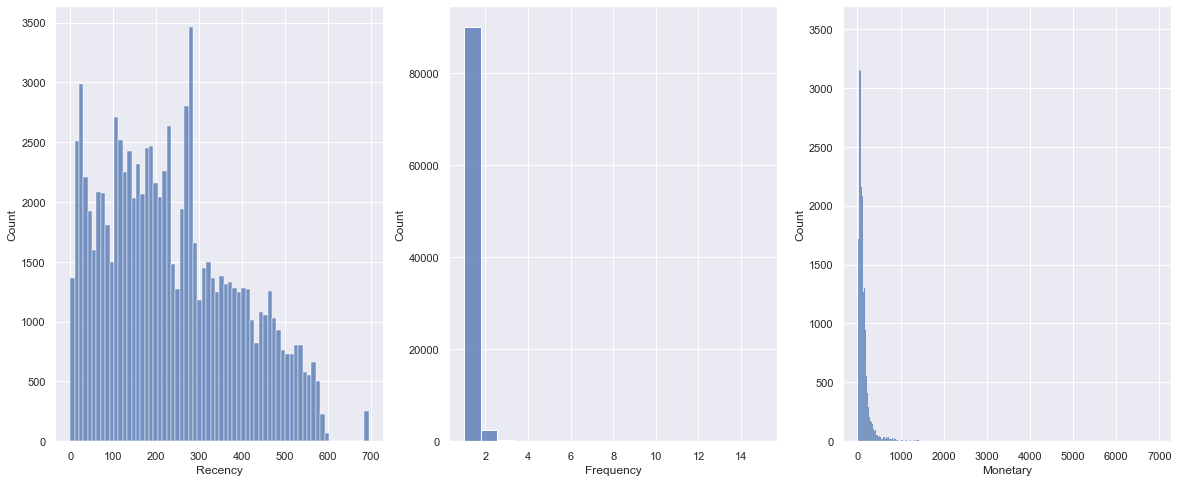

In [154]:
#Plot data distribution

plt.figure(figsize=(20,8))

plt.subplot(1,3,1)
sns.histplot(rfm['Recency'])

plt.subplot(1,3,2)
sns.histplot(rfm['Frequency'])

plt.subplot(1,3,3)
sns.histplot(rfm['Monetary'])
plt.show()

/Users/asus2/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/asus2/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/asus2/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar fle

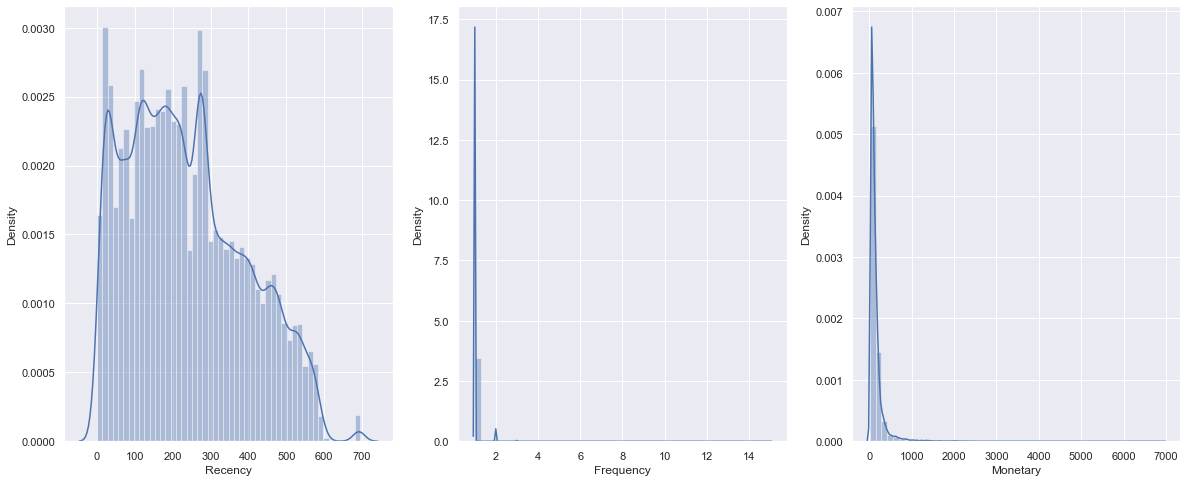

In [155]:
#Plot data distribution

plt.figure(figsize=(20,8))

plt.subplot(1,3,1)
sns.distplot(rfm['Recency'])

plt.subplot(1,3,2)
sns.distplot(rfm['Frequency'])

plt.subplot(1,3,3)
sns.distplot(rfm['Monetary'])
plt.show()

/Users/asus2/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/asus2/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/asus2/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.w

<AxesSubplot:xlabel='Monetary'>

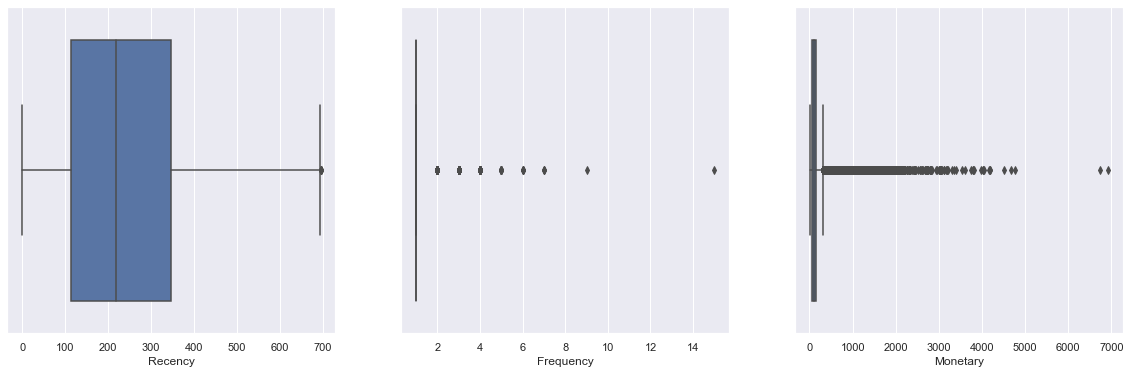

In [156]:
# Boxplot distributions of R, F, M
plt.figure(figsize=(20,6))

plt.subplot(1,3,1)
sns.boxplot(rfm['Recency'])

plt.subplot(1,3,2)
sns.boxplot(rfm['Frequency'])

plt.subplot(1,3,3)
sns.boxplot(rfm['Monetary'])


<b> Extension de la table RFM :<b> 

In [157]:
rfm["mean_score"]=df8["mean_score"]

In [158]:
rfm["total_orders"]=df8["total_orders"]

In [159]:
rfm["delivery_duration"]=df8["delivery_duration"]

In [160]:
rfm.head()

,customer_unique_id,Recency,Frequency,Monetary,R_score,F_score,M_score,RFMScore,mean_score,total_orders,delivery_duration
0,0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90,1,4,2,1-4-2,4.0,1,9.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19,1,4,4,1-4-4,1.0,2,19.0
2,0000f46a3911fa3c0805444483337064,537,1,86.22,4,4,3,4-4-3,1.0,2,19.0
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,43.62,3,4,4,3-4-4,3.0,1,19.0
4,0004aac84e0df4da2b147fca70cf8255,288,1,196.89,3,4,1,3-4-1,4.0,1,25.0


In [161]:
rfm.describe()

,Recency,Frequency,Monetary,R_score,F_score,M_score,mean_score,total_orders,delivery_duration
count,92754.000000,92754.000000,92754.000000,92754.000000,92754.000000,92754.000000,92754.000000,92754.000000,92749.000000
mean,237.326962,1.033174,145.821247,2.495698,3.910602,2.500151,4.071803,1.840977,12.476027
std,152.596725,0.208416,196.283049,1.119670,0.510102,1.118021,1.335157,2.954556,9.270911
min,0.000000,1.000000,9.341429,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,114.000000,1.000000,57.732500,1.000000,4.000000,2.000000,4.000000,1.000000,7.000000
50%,218.000000,1.000000,96.470000,2.000000,4.000000,3.000000,5.000000,1.000000,10.000000
75%,346.000000,1.000000,162.650000,3.000000,4.000000,3.750000,5.000000,2.000000,16.000000
max,695.000000,15.000000,6929.310000,4.000000,4.000000,4.000000,5.000000,75.000000,208.000000


In [162]:
rfm['RFMScore'].unique()

array(['1-4-2', '1-4-4', '4-4-3', '3-4-4', '3-4-1', '2-4-1', '2-4-4',
       '4-4-2', '2-4-2', '4-4-4', '3-4-2', '2-4-3', '1-4-3', '4-4-1',
       '3-4-3', '1-4-1', '3-1-1', '1-1-3', '4-1-3', '2-1-2', '2-1-3',
       '1-1-1', '1-1-2', '3-1-2', '4-1-2', '2-1-4', '3-1-4', '3-1-3',
       '1-1-4', '4-1-4', '2-1-1', '4-1-1'], dtype=object)

In [163]:
mean_var = rfm.groupby("RFMScore")[["Recency", "Frequency",
                                              "Monetary","mean_score","total_orders","delivery_duration"]].agg([np.mean, np.var])
mean_var["size"] = rfm.groupby('RFMScore')[['Recency']].agg([np.size]) 
mean_var

Recency              Frequency              Monetary  \
                mean          var      mean       var        mean   
RFMScore                                                            
1-1-1      60.239521  1156.327826  2.143713  0.232234  280.287645   
1-1-2      57.161017  1034.833538  2.122881  0.167815  126.139771   
1-1-3      58.204255  1168.641862  2.246809  1.186688   76.513062   
1-1-4      59.344595  1093.206977  2.067568  0.063431   42.294066   
1-4-1      57.898656  1073.810793  1.000000  0.000000  348.556414   
1-4-2      58.646723  1112.567495  1.000000  0.000000  126.153117   
1-4-3      56.212875  1153.494460  1.000000  0.000000   75.808843   
1-4-4      56.823058  1132.961557  1.000000  0.000000   40.459796   
2-1-1     168.251748   900.879838  2.069930  0.121836  246.459112   
2-1-2     171.333333   940.168196  2.136986  0.311424  121.953897   
2-1-3     167.803419   869.926855  2.179487  0.456916   77.402690   
2-1-4     164.728571   892.271120  2.107143  0.139517   44.166361   
2-4-1     165.081432   874.386557  1.000000  0.000000  333.014542   
2-4-2     165.359761   940.373361  1.000000  0.000000  125.488045   
2-4-3     166.597297   888.690578  1.000000  0.000000   75.379026   
2-4-4     167.224791   880.997841  1.000000  0.000000   40.861609   
3-1-1     277.140845  1487.866547  2.105634  0.109330  285.965224   
3-1-2     276.180412  1314.469873  2.072165  0.119118  124.430954   
3-1-3     279.613065  1099.894980  2.060302  0.077153   76.416924   
3-1-4     279.529851  1212.055493  2.052239  0.049882   44.422995   
3-4-1     277.709139  1258.427810  1.000000  0.000000  332.557791   
3-4-2     275.508341  1213.584385  1.000000  0.000000  125.242639   
3-4-3     277.656807  1235.902267  1.000000  0.000000   75.314734   
3-4-4     275.557468  1211.016828  1.000000  0.000000   40.917017   
4-1-1     432.715596  4552.946143  2.064220  0.060652  302.701710   
4-1-2     441.811189  4327.154240  2.055944  0.067271  123.996655   
4-1-3     430.005376  4203.432403  2.059140  0.055943   76.550300   
4-1-4     456.851852  5252.530127  2.155556  0.251741   41.616278   
4-4-1     451.110383  5213.891257  1.000000  0.000000  358.445019   
4-4-2     452.927329  4917.670810  1.000000  0.000000  125.475422   
4-4-3     447.415803  5103.615978  1.000000  0.000000   75.194047   
4-4-4     454.446907  5016.510155  1.000000  0.000000   40.920938   

                        mean_score           total_orders             \
                    var       mean       var         mean        var   
RFMScore                                                               
1-1-1      23680.999613   3.947605  1.931350     1.646707   1.735878   
1-1-2        351.414713   4.097881  1.618166     1.690678   2.359232   
1-1-3        113.071543   4.039818  1.708083     1.714894   2.486743   
1-1-4         90.909012   4.070946  1.928606     2.054054   8.813385   
1-4-1     109667.955662   4.094188  1.754426     1.790762   6.970864   
1-4-2        351.050945   4.084505  1.783990     1.858551   9.450414   
1-4-3        124.446565   4.080153  1.778459     1.954097  14.690228   
1-4-4        113.156127   4.062249  1.764099     1.783321   6.929339   
2-1-1      13936.862357   4.059274  1.575356     1.699301   2.408943   
2-1-2        369.422607   4.130518  1.682205     1.808219   5.146538   
2-1-3        114.363635   4.071937  1.760480     1.952991   5.461300   
2-1-4        104.258797   4.104762  1.859050     1.592857   2.487718   
2-4-1      86627.392313   4.067648  1.793639     1.854510   9.205966   
2-4-2        356.897966   4.046933  1.812669     1.829644   6.591006   
2-4-3        122.611005   4.068721  1.817146     1.823181   7.799655   
2-4-4        104.055497   4.079072  1.741079     1.822515   7.239571   
3-1-1      24119.923358   4.048335  1.821650     1.802817   3.294176   
3-1-2        364.121804   4.199141  1.545635     1.701031   6.573367   
3-1-3        117.735100   4.149497  1.606501     2.201005  29.908888   
3-1-4        

In [164]:

quartiles = rfm[["total_orders","delivery_duration"]].quantile([.25, .5,.75]).to_dict()
quartiles

{'total_orders': {0.25: 1.0, 0.5: 1.0, 0.75: 2.0},
 'delivery_duration': {0.25: 7.0, 0.5: 10.0, 0.75: 16.0}}

In [165]:
# Fontion de scoring pour " Total orders"
def OrderScore(x):
    if x<= quartiles["total_orders"][.25]:
        return 4
    elif x<= quartiles["total_orders"][.5]:
        return 3
    elif x<= quartiles["total_orders"][.75]:
        return 2
    else:
        return 1

In [166]:
# Fontion de scoring pour " Delivery duration"

def DeliveryScore(x):
    if x<= quartiles["delivery_duration"][0.25]:
        return 1
    elif x<= quartiles["delivery_duration"][0.5]:
        return 2
    elif x<=quartiles["delivery_duration"][0.75]:
        return 3
    else:
        return 4

In [167]:
# Delivery_Score for each customer

#rfm["Delivery_score"] = rfm["delivery_duration"].apply(lambda x: DeliveryScore(x))

In [168]:
rfm.head()

,customer_unique_id,Recency,Frequency,Monetary,R_score,F_score,M_score,RFMScore,mean_score,total_orders,delivery_duration
0,0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90,1,4,2,1-4-2,4.0,1,9.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19,1,4,4,1-4-4,1.0,2,19.0
2,0000f46a3911fa3c0805444483337064,537,1,86.22,4,4,3,4-4-3,1.0,2,19.0
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,43.62,3,4,4,3-4-4,3.0,1,19.0
4,0004aac84e0df4da2b147fca70cf8255,288,1,196.89,3,4,1,3-4-1,4.0,1,25.0


In [169]:
rfm.dtypes

customer_unique_id     object
Recency                 int64
Frequency               int64
Monetary              float64
R_score                 int64
F_score                 int64
M_score                 int64
RFMScore               object
mean_score            float64
total_orders            int64
delivery_duration     float64
dtype: object

In [170]:
rfm.isna().sum()

customer_unique_id    0
Recency               0
Frequency             0
Monetary              0
R_score               0
F_score               0
M_score               0
RFMScore              0
mean_score            0
total_orders          0
delivery_duration     5
dtype: int64

In [171]:
rfm.shape

(92754, 11)

In [172]:
# Creating customers segments

customer_segment = pd.DataFrame()

segment = ["Champion Customers", "Loyal Customers", "Potential loyalist", "Promising customers",
           "Dormant Customers", "At risk Customers", "Lost customers"]

list_rfm = ["1-1-1", "X-1-X", "X-X-1", "3-1-1", "4-1-1", "4-4-4", "others"]


Description=["Bought recently, buy always and spend a lot of money", "Buy reguralery and responsive to promotion",
            "Recent shoppers with high frequency","Recent shoppers but don't spend much",
             "Customers used to be active, but could be lost if not reactivated", "Make purchases somtimes but long time ago.\
             Must bring them back","Last buy since long time and low number of orders"]


In [173]:

customer_segment["RFM_score"] = list_rfm
customer_segment["Customer_segment"] = segment 
#customer_segment["Delivery_score"]=rfm["Delivery_score"]
customer_segment["mean_score"]=rfm["mean_score"]
customer_segment["total_orders"]=rfm["total_orders"]
customer_segment["delivery_duration"]=rfm["delivery_duration"]

customer_segment 

,RFM_score,Customer_segment,mean_score,total_orders,delivery_duration
0,1-1-1,Champion Customers,4.0,1,9.0
1,X-1-X,Loyal Customers,1.0,2,19.0
2,X-X-1,Potential loyalist,1.0,2,19.0
3,3-1-1,Promising customers,3.0,1,19.0
4,4-1-1,Dormant Customers,4.0,1,25.0
5,4-4-4,At risk Customers,4.0,1,19.0
6,others,Lost customers,4.0,1,13.0


In [174]:
sums = []
X1X = ["1-1-2", "1-1-3", "1-1-4", "2-1-1", "2-1-2", "2-1-3", "2-1-4"]
XX1 = ["1-2-1", "1-3-1", "1-4-1", "2-2-1", "2-3-1", "2-4-1"]
for r in list_rfm:
    count = 0
    if r == "X-1-X":
        for j, row in rfm.iterrows():
            if row["RFMScore"] in X1X:
                count += 1
        sums.append(count)
    if r == "X-X-1":
        for j, row in rfm.iterrows():
            if row["RFMScore"] in XX1 and r != "2-1-1":
                count += 1
        sums.append(count)
    if r != "X-1-X" and r != "X-X-1" and r != "others":
        for j, row in rfm.iterrows():
            if row["RFMScore"] == r:
                count += 1
        sums.append(count)
    if r == "others":
        for j, row in rfm.iterrows():
            if row["RFMScore"] not in rfm and row["RFMScore"] not in X1X and \
            row["RFMScore"] not in XX1:
                count += 1
        sums.append(count)
        

customer_segment["Number of customers"] = sums

In [175]:
customer_segment["activity"] = Description

customer_segment

,RFM_score,Customer_segment,mean_score,total_orders,delivery_duration,Number of customers,activity
0,1-1-1,Champion Customers,4.0,1,9.0,167,"Bought recently, buy always and spend a lot of money"
1,X-1-X,Loyal Customers,1.0,2,19.0,1355,Buy reguralery and responsive to promotion
2,X-X-1,Potential loyalist,1.0,2,19.0,11500,Recent shoppers with high frequency
3,3-1-1,Promising customers,3.0,1,19.0,142,Recent shoppers but don't spend much
4,4-1-1,Dormant Customers,4.0,1,25.0,109,"Customers used to be active, but could be lost if not reactivated"
5,4-4-4,At risk Customers,4.0,1,19.0,5820,Make purchases somtimes but long time ago. Must bring them back
6,others,Lost customers,4.0,1,13.0,79899,Last buy since long time and low number of orders


In [176]:
customer_segment["Number of customers"].sum()

98992

In [177]:
customer_segment.dtypes

RFM_score               object
Customer_segment        object
mean_score             float64
total_orders             int64
delivery_duration      float64
Number of customers      int64
activity                object
dtype: object

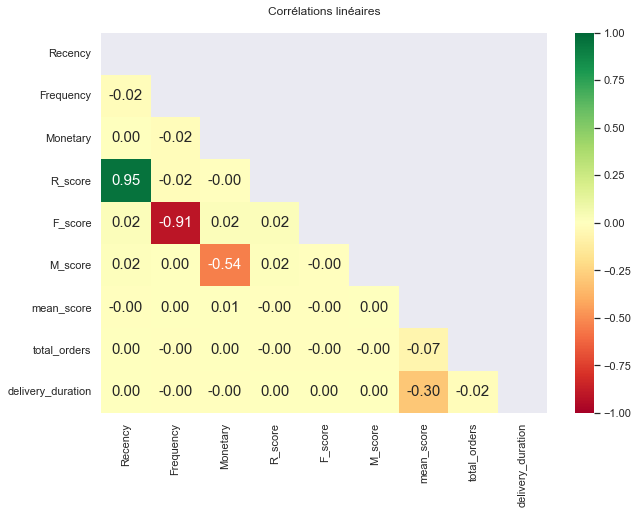

In [178]:
# Corrélation entre les variables
corr = rfm.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10,7))
ax = sns.heatmap(corr, annot=True,
                 vmin=-1, vmax=1,
                 fmt=".2f", annot_kws={'size':15}, 
                mask=mask, 
                 center=0, 
                 cmap ='RdYlGn')
               #  cmap ='GnBu')
plt.title(f"Corrélations linéaires\n", )
plt.show()

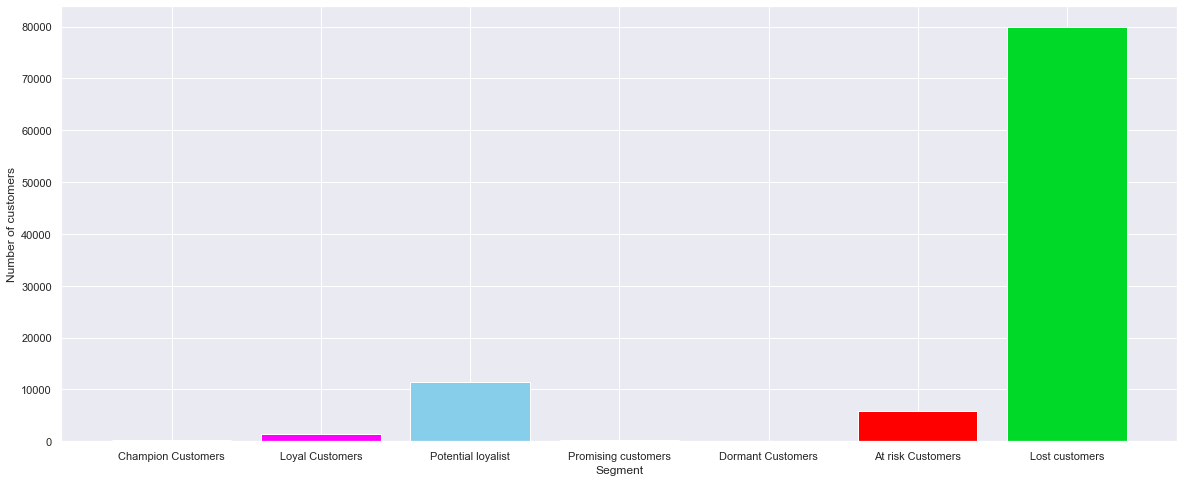

In [179]:
plt.figure(figsize=(20, 8))
plt.bar(customer_segment["Customer_segment"], customer_segment["Number of customers"], align='center',
       color=["black", "magenta", "#87ceeb", "blue", "lime", "red", "#00d927" , "#00d994"]
       )
plt.xlabel('Segment')
plt.ylabel("Number of customers")
plt.show()

In [180]:
rfm.columns

Index(['customer_unique_id', 'Recency', 'Frequency', 'Monetary', 'R_score',
       'F_score', 'M_score', 'RFMScore', 'mean_score', 'total_orders',
       'delivery_duration'],
      dtype='object')

In [181]:
df8.shape

(114859, 17)

In [182]:
df8.head()

,customer_unique_id,order_id,order_purchase_timestamp,order_item_id,product_category_name,product_category,delivery_duration,total_cost,books_cds_media,fashion_clothing,gifts_flowers,health_beauty,others,sports_outdoor,technology,mean_score,total_orders
0,861eff4711a542e4b93843c6dd7febb0,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:35,1,moveis_escritorio,others,9.0,146.87,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,1
1,9eae34bbd3a474ec5d07949ca7de67c0,c1d2b34febe9cd269e378117d6681172,2017-11-09 00:50:13,1,moveis_escritorio,others,19.0,137.89,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2
2,9eae34bbd3a474ec5d07949ca7de67c0,c1d2b34febe9cd269e378117d6681172,2017-11-09 00:50:13,2,moveis_escritorio,others,19.0,137.89,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2
3,3c799d181c34d51f6d44bbbc563024db,b1a5d5365d330d10485e0203d54ab9e8,2017-05-07 20:11:26,1,moveis_escritorio,others,19.0,140.61,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,1
4,23397e992b09769faf5e66f9e171a241,2e604b3614664aa66867856dba7e61b7,2018-02-03 19:45:40,1,moveis_escritorio,others,25.0,137.58,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,1


In [183]:
df8.isna().sum()

customer_unique_id             0
order_id                       0
order_purchase_timestamp       0
order_item_id                  0
product_category_name       1626
product_category               0
delivery_duration              8
total_cost                     0
books_cds_media                0
fashion_clothing               0
gifts_flowers                  0
health_beauty                  0
others                         0
sports_outdoor                 0
technology                     0
mean_score                     0
total_orders                   0
dtype: int64

In [184]:
df8["Recency"]=rfm["Recency"]

In [185]:
df8["Frequency"]=rfm["Frequency"]

In [186]:
df8["Monetary"]=rfm["Monetary"]

In [187]:
df8["delivery_duration"]=rfm["delivery_duration"]

In [188]:
df8.head()

,customer_unique_id,order_id,order_purchase_timestamp,order_item_id,product_category_name,product_category,delivery_duration,total_cost,books_cds_media,fashion_clothing,gifts_flowers,health_beauty,others,sports_outdoor,technology,mean_score,total_orders,Recency,Frequency,Monetary
0,861eff4711a542e4b93843c6dd7febb0,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:35,1,moveis_escritorio,others,9.0,146.87,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,1,111.0,1.0,141.90
1,9eae34bbd3a474ec5d07949ca7de67c0,c1d2b34febe9cd269e378117d6681172,2017-11-09 00:50:13,1,moveis_escritorio,others,19.0,137.89,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2,114.0,1.0,27.19
2,9eae34bbd3a474ec5d07949ca7de67c0,c1d2b34febe9cd269e378117d6681172,2017-11-09 00:50:13,2,moveis_escritorio,others,19.0,137.89,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2,537.0,1.0,86.22
3,3c799d181c34d51f6d44bbbc563024db,b1a5d5365d330d10485e0203d54ab9e8,2017-05-07 20:11:26,1,moveis_escritorio,others,19.0,140.61,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,1,321.0,1.0,43.62
4,23397e992b09769faf5e66f9e171a241,2e604b3614664aa66867856dba7e61b7,2018-02-03 19:45:40,1,moveis_escritorio,others,25.0,137.58,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,1,288.0,1.0,196.89


In [189]:
df8.shape

(114859, 20)

In [190]:
df8.isna().sum()

customer_unique_id              0
order_id                        0
order_purchase_timestamp        0
order_item_id                   0
product_category_name        1626
product_category                0
delivery_duration           22110
total_cost                      0
books_cds_media                 0
fashion_clothing                0
gifts_flowers                   0
health_beauty                   0
others                          0
sports_outdoor                  0
technology                      0
mean_score                      0
total_orders                    0
Recency                     22105
Frequency                   22105
Monetary                    22105
dtype: int64

In [191]:
df8.dtypes

customer_unique_id                  object
order_id                            object
order_purchase_timestamp    datetime64[ns]
order_item_id                        int64
product_category_name               object
product_category                    object
delivery_duration                  float64
total_cost                         float64
books_cds_media                    float64
fashion_clothing                   float64
gifts_flowers                      float64
health_beauty                      float64
others                             float64
sports_outdoor                     float64
technology                         float64
mean_score                         float64
total_orders                         int64
Recency                            float64
Frequency                          float64
Monetary                           float64
dtype: object

In [192]:
df8.dropna(axis=0, inplace=True)

In [193]:
df8.isnull().sum()

customer_unique_id          0
order_id                    0
order_purchase_timestamp    0
order_item_id               0
product_category_name       0
product_category            0
delivery_duration           0
total_cost                  0
books_cds_media             0
fashion_clothing            0
gifts_flowers               0
health_beauty               0
others                      0
sports_outdoor              0
technology                  0
mean_score                  0
total_orders                0
Recency                     0
Frequency                   0
Monetary                    0
dtype: int64

In [194]:
df8.shape

(91521, 20)

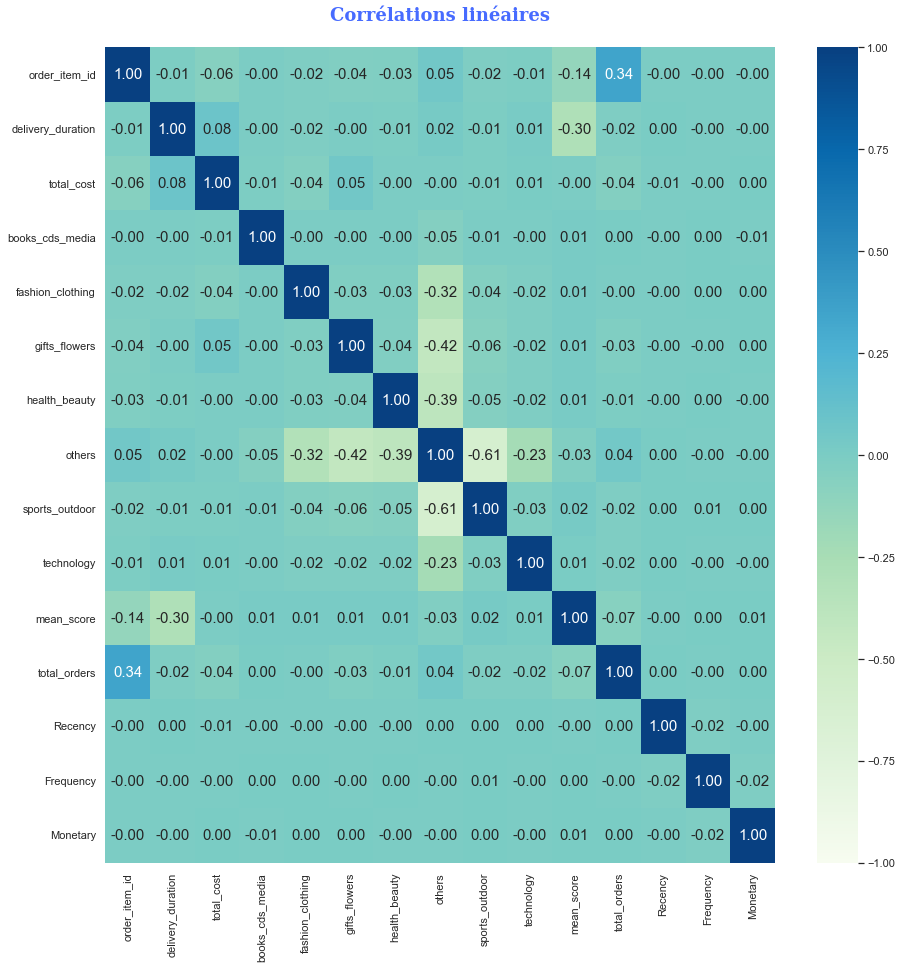

In [195]:
# Corrélation entre les variables
corr = df8.corr()
fig, ax = plt.subplots(figsize=(15,15))
ax = sns.heatmap(corr, annot=True,
                 vmin=-1, vmax=1,
                 fmt=".2f", annot_kws={'size':15}, 
                 center=0, 
                # cmap ='RdYlGn')
                 cmap ='GnBu')
plt.title(f"Corrélations linéaires\n", 
          fontdict=font_title)
plt.show()

In [196]:
df8.to_csv("exploration.csv")